<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Methods" data-toc-modified-id="Methods-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Methods</a></span><ul class="toc-item"><li><span><a href="#DBSCAN" data-toc-modified-id="DBSCAN-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>DBSCAN</a></span></li><li><span><a href="#One-Class-SVM" data-toc-modified-id="One-Class-SVM-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>One Class SVM</a></span></li><li><span><a href="#Isolation-Forest" data-toc-modified-id="Isolation-Forest-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Isolation Forest</a></span></li><li><span><a href="#Auto-Encoders" data-toc-modified-id="Auto-Encoders-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Auto-Encoders</a></span></li><li><span><a href="#GANomaly" data-toc-modified-id="GANomaly-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>GANomaly</a></span></li></ul></li></ul></div>

# Anomaly Detection

## Introduction

**Anomaly detection** is an important problem in machine learning and has a 
wide range of applications such as fraud detection, 
network intrusion detection, 
event detection (e.g. interesting particle collisions in Large Hadron Collider), 
medical diagnosis (e.g. spotting a malignant tumor in an MRI scan), 
and X-Ray detection of restricted objects in baggage for airlines etc. 

A typical **anomaly detection** algorithm is given a lot of data where the algorithm attempts 
to learn in an unsupervised way a *compact* representation of the data assuming 
that most of the samples are *normal*.
Samples inconsistent with that *compact* representation are *anomalous*.

Various ML algorithms are used for **anomaly detection**,

Some of the ML algorithms we will explore are:
1. Density based Anomaly Detection - **DBSCAN**.
2. Support Vector Machine based Anomaly Detection - **One Class SVM**.
3. Decision tree based Anomaly Detection - **Isolation Forest**.
4. Deep Neural Network based Anomaly Detection - **Autoencoders**.
5. GANs-Based Anomaly Detection - **GANomaly**.

Techniques like **DBSCAN** and **One Class SVM**
are traditional ML techniques and 
others like **GANomaly** are cutting edge deep learning methods. 
Many other methods have been successfully applied to anomaly detection. 
The above list is a representative selection of methods in the literature.

## Methods
### DBSCAN

**Density-based spatial clustering of applications with noise (DBSCAN)** is a very popular clustering algorithm proposed by Martin Ester et.al. 
https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf

**DBSCAN** is a density-based clustering algorithm. Given a set of points, it groups points that are close together, and marks the points that can't be put in any cluster as anomalous. 
Clusters found by **DBSCAN** can be of any shape and the distance to determine the clusters can be non-Euclidean.
The flexibility for the choice of the distance measure makes the algorithm very generic. 
Variants of **DBSCAN** have been successfully applied to many Anomaly Detection problems.

In [1]:
#Regular imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#Set font size of Matplotlib
matplotlib.rcParams.update({'font.size': 22})
%matplotlib inline

#Set font size of seaborn
sns.set(font_scale=2)

Below we create synthetic dataset to show application of **DBSCAN**.
Dataset is sampled from three **Gaussian** distributions centered at, (0,0), (0.86,0.5) and (0,1)
and there are two outliers at (1.5,0) and (0,2). 

In [2]:
from sklearn.cluster import DBSCAN
n_points_per_cluster = 1000

#Cluster 1 at -> (0,0)
C1 = [0, 0] +  0.1 * np.random.randn(n_points_per_cluster, 2)
y1 = np.ones(shape=n_points_per_cluster)

#Cluster 2 at -> (0.86,0.5)
C2 = [0.86, 0.5] + 0.1 * np.random.randn(n_points_per_cluster, 2)
y2 = np.ones(shape=n_points_per_cluster) + 1

#Cluster 3 at -> (0,1)
C3 = [0, 1] + 0.1 * np.random.randn(n_points_per_cluster, 2)
y3 = np.ones(shape=n_points_per_cluster) + 2

#Anomalies
C4 = np.array([[1.5,0],[0,2]])
y4 = [4,4]

X = np.vstack((C1, C2, C3, C4))
y = np.hstack((y1,y2,y3,y4))
y= y.astype('int')

Text(0, 0.5, 'X2')

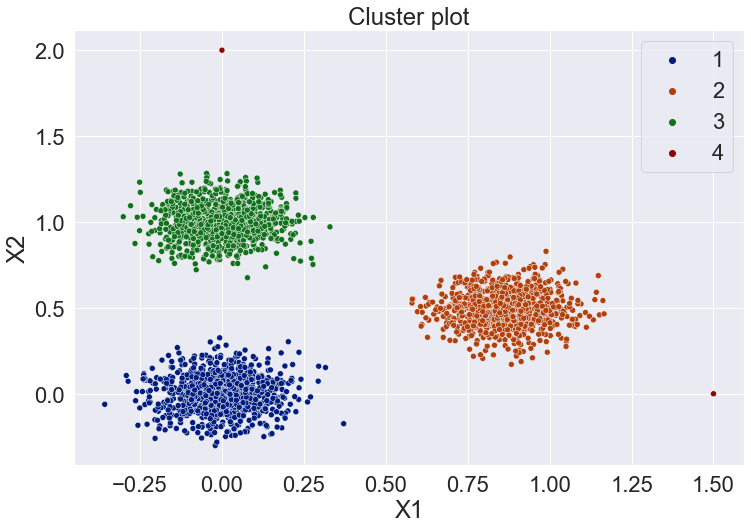

In [3]:
plt.figure(figsize=(12,8))
plt.title('Cluster plot')
ax = sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette='dark')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

From the above plot we can see there are three clusters 1,2, and 3 and then there are two outliers at (1.5,0) and (0,2). Now we will apply **DBSCAN** to identify these clusters and outliers.

In [4]:
#We initialize DBScan with epsilon of 0.2 and min_samples of 10
dbscan = DBSCAN(eps=0.2, min_samples=10)

In [5]:
y_dbscan = dbscan.fit_predict(X)

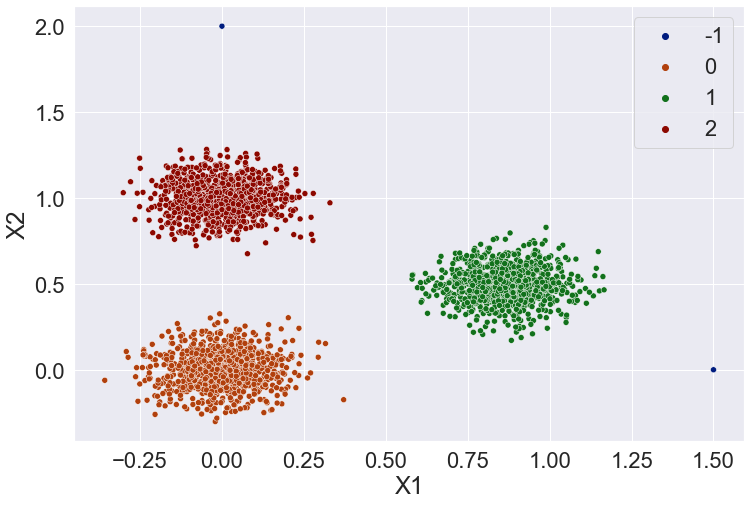

In [6]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_dbscan, palette='dark')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.savefig('DBSCAN.png')

We can see from the plot above **DBSCAN** correctly identified the three clusters 0,1, and 2 and also identified the two outliers with -1.

This is a toy example but should illustrate the application of **DBSCAN**. Other popular variation of **DBSCAN** is **OPTICS**, it can also identify clusters of very different densities.

### One Class SVM

**One Class SVM** is another very popular anomaly detection algorithm. 
**One Class SVM** is a special type of **SVM** which is trained on normal data,
during training it learns the boundary of normal 
data and classifies anything which is not inside the boundary as anomalous. 


Method was originally proposed in this paper, http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.675.575&rep=rep1&type=pdf. Its still a fairly popular method for Anomaly detection especially when datasets are not that large.

Below we will demonstrate the use of **One Class SVM** on credit card fraud dataset from Kaggle https://www.kaggle.com/mlg-ulb/creditcardfraud.

There are 492 cases of fraud out of 284,807 transactions.

In [7]:
#Lets load the data
data = pd.read_csv('../data/creditcard.csv')

In [8]:
#Lets look at the head of the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Data has 31 columns, we will drop the Time columns and Class column has tag fraud or not.

In [10]:
#drop time column
data.drop(['Time'],inplace=True, axis=1)

In [11]:
#Lets look a the distribution of normal and anomalous data
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
data_normal = data[data['Class']==0]
data_anomalous = data[data['Class']==1]

In [13]:
X_normal = data_normal.drop(['Class'], axis=1).values
#Lets downsample the X_normal data so that we can compute quickly
number_of_rows=20000
np.random.seed(42)
ran_rows = np.random.choice(X_normal.shape[0], size=number_of_rows, replace=False)
X_normal = X_normal[ran_rows,:]
X_anomalous = data_anomalous.drop(['Class'], axis=1).values

Train set is made of 80% normal data, test set and dev set are made of 10% normal and 50% anomalous data.

In [14]:
from sklearn.model_selection import train_test_split
X_nm_train, X_nm_test_dev = train_test_split(X_normal, train_size=0.8)
X_nm_test, X_nm_dev = train_test_split(X_nm_test_dev, train_size=0.5)
X_a_test, X_a_dev = train_test_split(X_anomalous, train_size=0.5)
#Train set only has normal samples
X_train = X_nm_train
#Dev set has 10% of Normal samples and 50% of anomalous samples
X_dev = np.vstack([X_nm_dev, X_a_dev])
y_dev = np.vstack([np.full(shape=(X_nm_dev.shape[0],1), dtype='int',fill_value=1), 
                   np.full(shape=(X_a_dev.shape[0],1), dtype='int',fill_value=-1)])
#Test set has 10% of Normal samples and 50% of anomalous samples
X_test = np.vstack([X_nm_test, X_a_test])
y_test = np.vstack([np.full(shape=(X_nm_test.shape[0],1),dtype='int',fill_value=1),
                    np.full(shape=(X_a_test.shape[0],1), dtype='int',fill_value=-1)])

In [15]:
print(f"Train set shape={X_train.shape}")
print(f"Dev set shape={X_dev.shape}")
print(f"Test set shape={X_test.shape}")
print(f"Normal data points in Dev Set={np.sum(y_dev==1)}")
print(f"Normal data points in Test Set={np.sum(y_test==1)}")
print(f"Anomalies in Dev Set={np.sum(y_dev==-1)}")
print(f"Anomalies in Test Set={np.sum(y_test==-1)}")

Train set shape=(16000, 29)
Dev set shape=(2246, 29)
Test set shape=(2246, 29)
Normal data points in Dev Set=2000
Normal data points in Test Set=2000
Anomalies in Dev Set=246
Anomalies in Test Set=246


In [16]:
#Now lets normalize X data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_dev_std = sc.transform(X_dev)
X_test_std = sc.transform(X_test)

In [17]:
#Lets train oneclass SVM with default parameters
from sklearn.svm import OneClassSVM
clf = OneClassSVM().fit(X_train_std)

In [18]:
#Lets make prediction on dev and test set
y_dev_pred = clf.predict(X_dev_std)
y_test_pred = clf.predict(X_test_std)

In [19]:
#Lets look at confusion matrix 
from sklearn.metrics import confusion_matrix, f1_score
cm = confusion_matrix(y_dev, y_dev_pred)
print("Dev Confusion matrix")
print(cm)
print("Test Confusion matrix")
cm=confusion_matrix(y_test, y_test_pred)
print(cm)

Dev Confusion matrix
[[ 240    6]
 [1025  975]]
Test Confusion matrix
[[ 239    7]
 [1025  975]]


Not very good performance. Lets use hold out CV to tune some parameters of OneClassSVM.

In [20]:
#Let write a simple holdout CV loop to find good hyper parameters for OneClassSVM
gammas = np.logspace(-4,0,5)
nus = np.linspace(0.01,0.1,5)
for g in gammas:
    for nu in nus:
        clf = OneClassSVM(gamma=g, nu=nu)
        clf.fit(X_train_std)
        y_dev_pred = clf.predict(X_dev_std)
        print(f"gamma={g:.2}, nu = {nu:.2}, CV score = {f1_score(y_dev,y_dev_pred, pos_label=-1):.4}")

gamma=0.0001, nu = 0.01, CV score = 0.808
gamma=0.0001, nu = 0.033, CV score = 0.7895
gamma=0.0001, nu = 0.055, CV score = 0.7418
gamma=0.0001, nu = 0.077, CV score = 0.6998
gamma=0.0001, nu = 0.1, CV score = 0.6479
gamma=0.001, nu = 0.01, CV score = 0.8186
gamma=0.001, nu = 0.033, CV score = 0.791
gamma=0.001, nu = 0.055, CV score = 0.7431
gamma=0.001, nu = 0.077, CV score = 0.6998
gamma=0.001, nu = 0.1, CV score = 0.6479
gamma=0.01, nu = 0.01, CV score = 0.8481
gamma=0.01, nu = 0.033, CV score = 0.7932
gamma=0.01, nu = 0.055, CV score = 0.7443
gamma=0.01, nu = 0.077, CV score = 0.6998
gamma=0.01, nu = 0.1, CV score = 0.6432
gamma=0.1, nu = 0.01, CV score = 0.5963
gamma=0.1, nu = 0.033, CV score = 0.5963
gamma=0.1, nu = 0.055, CV score = 0.5931
gamma=0.1, nu = 0.077, CV score = 0.5939
gamma=0.1, nu = 0.1, CV score = 0.5907
gamma=1.0, nu = 0.01, CV score = 0.2179
gamma=1.0, nu = 0.033, CV score = 0.2174
gamma=1.0, nu = 0.055, CV score = 0.2179
gamma=1.0, nu = 0.077, CV score = 0.2176
g

In [21]:
#Lets fit the best classifier
clf = OneClassSVM(gamma=0.01, nu=0.01)
clf.fit(X_train_std)
y_dev_pred = clf.predict(X_dev_std)
cm = confusion_matrix(y_dev, y_dev_pred)
print(cm)
print(f"Dev F1 Score = {f1_score(y_dev,y_dev_pred, pos_label=-1):0.3}")

#Lets also check the test set
y_test_pred = clf.predict(X_test_std)
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
print(f"Test F1 Score = {f1_score(y_test,y_test_pred, pos_label=-1):0.3}")

[[ 201   45]
 [  27 1973]]
Dev F1 Score = 0.848
[[ 204   42]
 [  25 1975]]
Test F1 Score = 0.859


We can see from the results that we have a very high F1 score in test and dev set.
In test set algorithm is able to identify 207 out of 246 anomalies.

### Isolation Forest

**Isolation Forest** is one of the most successful method for Anomaly/outlier detection.
**Isolation Forest** was first proposed in this paper
https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf?q=isolation-forest

**Isolation Forest** is based on the idea that anomalous data-points are easier to isolate 
from rest of the samples than normal data-points. 
In order to isolate data-points **Isolation Forest** recursively splits the data by randomly selecting
a feature and a random split value of the feature until the data-points are isolated in their own leaf nodes.

Splits required to isolate a point are equal to the depth of the point in the tree. 
Authors of the algorithm made an observation that since anomalies 
are so different from normal data they will have less depth in the tree (or would require less splits to isolate) 
than normal data points. 
The depth of each point in the tree is averaged over multiple trees in a forest. 
Finally average depth of a point is used to calculate an anomaly score between 
the scale of -1 and 1. An anomaly score of -1 indicates surely an anomaly and an anomaly score of 1 indicates surely a normal data point.

Below in the notebook we will use **KDDCup99 (HTTP)** dataset 

https://scikit-learn.org/stable/datasets/real_world.html#kddcup-99-dataset

This dataset was initially created by DARPA to detect intrusion of their systems and is a standard dataset used for anomaly detection.

In [22]:
#Download KDDCup99 (HTTP) data 
from sklearn.datasets import fetch_kddcup99
data = fetch_kddcup99(subset='http', as_frame=True, percent10=False)

In [23]:
df = data['frame']

In [24]:
df['labels'].value_counts()

b'normal.'       565287
b'back.'           2203
b'phf.'               4
b'satan.'             2
b'portsweep.'         1
b'ipsweep.'           1
Name: labels, dtype: int64

In [25]:
df[df['labels']==b'back.']['src_bytes']

311452    10.906691
311453    10.906691
311454    10.906691
311455    10.906691
311456    10.906691
            ...    
514435    10.906691
514436    10.906691
514437    10.906691
514438    10.906691
514439    10.906691
Name: src_bytes, Length: 2203, dtype: object

In [26]:
#Convert the labels to ints
df.loc[df['labels']==b'normal.','labels']=1
df.loc[(df['labels']!=b'normal.') & (df['labels']!=1),'labels']=-1

In [27]:
df.labels.value_counts()

 1    565287
-1      2211
Name: labels, dtype: int64

In [28]:
df.head()

,duration,src_bytes,dst_bytes,labels
0,-2.302585,5.371103,10.716107,1
1,-2.302585,5.088213,8.418058,1
2,-2.302585,5.464255,7.113224,1
3,-2.302585,5.451468,7.616825,1
4,-2.302585,5.476882,6.186414,1


In [29]:
#We will follow similar strategy as before for train test split
X_normal = df[df['labels']==1][['duration','src_bytes','dst_bytes']].values
X_anomalous = df[df['labels']==-1][['duration','src_bytes','dst_bytes']].values

In [30]:
from sklearn.model_selection import train_test_split
X_nm_train, X_nm_test_dev = train_test_split(X_normal, train_size=0.8, random_state=42)
X_nm_test, X_nm_dev = train_test_split(X_nm_test_dev, train_size=0.5, random_state=42)
X_a_test, X_a_dev = train_test_split(X_anomalous, train_size=0.5, random_state=42)
#Train set only has normal samples
X_train = X_nm_train

#Dev set has 10% of Normal samples and 50% of anomalous samples
X_dev = np.vstack([X_nm_dev, X_a_dev])
y_dev = np.vstack([np.full(shape=(X_nm_dev.shape[0],1), dtype='int',fill_value=1), 
                   np.full(shape=(X_a_dev.shape[0],1), dtype='int',fill_value=-1)])

#Test set has 10% of Normal samples and 50% of anomalous samples
X_test = np.vstack([X_nm_test, X_a_test])
y_test = np.vstack([np.full(shape=(X_nm_test.shape[0],1),dtype='int',fill_value=1),
                    np.full(shape=(X_a_test.shape[0],1), dtype='int',fill_value=-1)])

In [31]:
print(f"Train set shape={X_train.shape}")
print(f"Dev set shape={X_dev.shape}")
print(f"Test set shape={X_test.shape}")
print(f"Normal data points in Dev Set={np.sum(y_dev==1)}")
print(f"Normal data points in Test Set={np.sum(y_test==1)}")
print(f"Anomalies in Dev Set={np.sum(y_dev==-1)}")
print(f"Anomalies in Test Set={np.sum(y_test==-1)}")

Train set shape=(452229, 3)
Dev set shape=(57635, 3)
Test set shape=(57634, 3)
Normal data points in Dev Set=56529
Normal data points in Test Set=56529
Anomalies in Dev Set=1106
Anomalies in Test Set=1105


In [32]:
#Lets train isolated forest with default parameters
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=42).fit(X_train)

In [33]:
#Lets make prediction on test and dev sets
y_dev_pred = clf.predict(X_dev)
y_test_pred = clf.predict(X_test)

In [34]:
#Lets look at confusion matrix 
from sklearn.metrics import confusion_matrix, f1_score
cm = confusion_matrix(y_dev, y_dev_pred)
print("Confusion matrix dev set")
print(cm)

cm=confusion_matrix(y_test, y_test_pred)
print("Confusion matrix test set")
print(cm)

print(f"Test set Recall = {cm[0][0]/(cm[0][0]+cm[0][1]):.3}")
print(f"Test set Precision = {cm[0][0]/(cm[0][0]+cm[1][0]):.3}")

Confusion matrix dev set
[[ 1106     0]
 [ 8840 47689]]
Confusion matrix test set
[[ 1105     0]
 [ 8833 47696]]
Test set Recall = 1.0
Test set Precision = 0.111


Algorithm has 100% recall and a precision of 11.1% in test set.

In [35]:
#Let write a simple CV loop to find good hyper parameters for Isolation Forest
n_estimators = [100, 200, 500, 1000]
for n in n_estimators:
    clf = IsolationForest(n_estimators=n, random_state=42)
    clf.fit(X_train)
    y_dev_pred = clf.predict(X_dev)
    print(f"n_estimaters={n}, CV score = {f1_score(y_dev, y_dev_pred, pos_label=-1):.4}")

n_estimaters=100, CV score = 0.2001
n_estimaters=200, CV score = 0.2079
n_estimaters=500, CV score = 0.2192
n_estimaters=1000, CV score = 0.2158


Best estimator is with n_estimaters=500

In [36]:
clf = IsolationForest(n_estimators=500, random_state=42).fit(X_train)
y_dev_pred = clf.predict(X_dev)
y_test_pred = clf.predict(X_test)
print(f"Dev score = {f1_score(y_dev, y_dev_pred, pos_label=-1):.4}")
print(f"Test score = {f1_score(y_test, y_test_pred, pos_label=-1):.4}")

cm=confusion_matrix(y_test, y_test_pred)
print(cm)

Dev score = 0.2192
Test score = 0.2204
[[ 1105     0]
 [ 7816 48713]]


Algorithm is able to detect all the anomalies. But it did raise 7816 false positives.

In [37]:
scores_test = clf.decision_function(X_test)
df_scores_test = pd.DataFrame({'labels':y_test.flatten(), 'scores': scores_test})

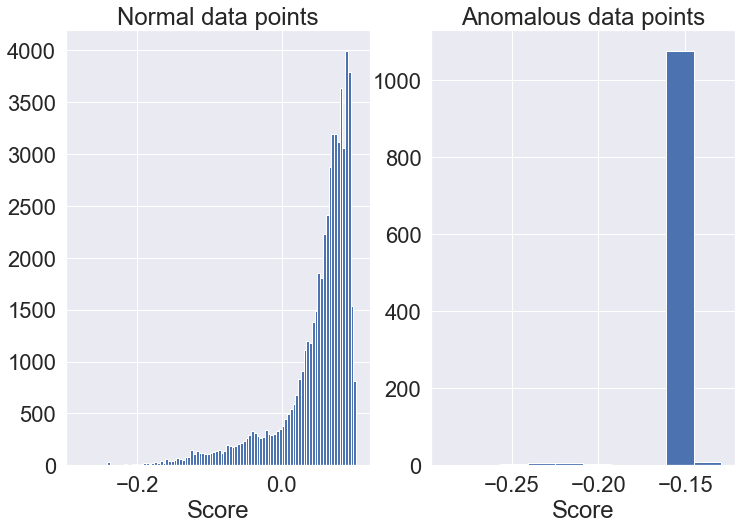

In [38]:
plt.figure(figsize=(12,8))
ax1 = plt.subplot(1,2,1)
ax1.set_title('Normal data points')
ax1.set_xlabel('Score')
df_scores_test[df_scores_test['labels']==1]['scores'].hist(bins=100,ax =ax1)
ax2 = plt.subplot(1,2,2)
ax2.set_title('Anomalous data points')
ax2.set_xlabel('Score')
df_scores_test[df_scores_test['labels']==-1]['scores'].hist(bins=10,ax =ax2)

plt.savefig('AnomalyScore.png')

### Auto-Encoders

**Auto-Encoder** is a neural network architecture used to learn low dimensional representations of very high dimensional data. 
This is done by designing a neural network such that there is a 
bottleneck in the network which forces a compressed representation of the original input. 
**Auto-Encoders** can be very effective in anomaly detection. 
This is done by training the **Auto-Encoder** on large volumes 
of normal data and then if an anomalous data-point comes 
Auto-Encoder won't be able to reconstruct it and will 
have a large reconstruction error. 
This reconstruction error can be used to classify data as normal or anomalous.
and can also be used as an anomaly score.

There are some excellent blog posts on **AutoEncoders** 
https://www.jeremyjordan.me/autoencoders/

And a recent review article https://arxiv.org/pdf/2003.05991.pdf.

In the notebook below we will use PyOD (https://pyod.readthedocs.io/en/latest/), an excellent library for outlier detection, to train an **AutoEncoder** on synthetic data and use it for anomaly detection.

In [39]:
#Import libraries
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import generate_data

#Generate synthetic data
outlier_fraction = 0.01 
n_train = 5000
n_dev = 500
n_test = 500  
n_features = 50

X_train, X_test_dev, y_train, y_test_dev = generate_data(
    n_train=n_train, n_test=n_test+n_dev,
    n_features= n_features,
    behaviour='new',
    contamination=outlier_fraction, 
    random_state=42)

X_train = pd.DataFrame(X_train)
X_dev = np.vstack([X_test_dev[0:495,:],X_test_dev[990:995,:]])
y_dev = np.vstack([np.zeros(shape=(495,1), dtype='int'), 
                   np.ones(shape=(5,1), dtype='int')]).reshape(500,)

X_test = np.vstack([X_test_dev[495:990,:],X_test_dev[995:,:]])
y_test = np.vstack([np.zeros(shape=(495,1), dtype='int'), 
                   np.ones(shape=(5,1), dtype='int')]).reshape(500,)

In [40]:
print(f"Shape of X_train {X_train.shape}")
print(f"Shape of X_dev {X_dev.shape}")
print(f"Shape of X_test {X_test.shape}")
print(f"Anomalies in train set {int(np.sum(y_train))}")
print(f"Anomalies in test set {np.sum(y_test)}")
print(f"Anomalies in dev set {np.sum(y_dev)}")

Shape of X_train (5000, 50)
Shape of X_dev (500, 50)
Shape of X_test (500, 50)
Anomalies in train set 50
Anomalies in test set 5
Anomalies in dev set 5


In [41]:
#Standardize the inputs
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_dev_std   = sc.transform(X_dev)
X_test_std  = sc.transform(X_test)

In [42]:
#Lets build a simple auto encoder with input layer of 50 neurons 
#and bottleneck layers of 5 neurons
clf = AutoEncoder(hidden_neurons=[50,5,50], random_state=42)
#Lets fit the autoencoder
clf.fit(X_train_std) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                2550      
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 2

141/141 [==============================] - 0s 2ms/step - loss: 1.0675 - val_loss: 0.8487
Epoch 64/100
141/141 [==============================] - 0s 2ms/step - loss: 1.0242 - val_loss: 0.8487
Epoch 65/100
141/141 [==============================] - 0s 2ms/step - loss: 0.9209 - val_loss: 0.8488
Epoch 66/100
141/141 [==============================] - 0s 2ms/step - loss: 1.0600 - val_loss: 0.8481
Epoch 67/100
141/141 [==============================] - 0s 2ms/step - loss: 0.9888 - val_loss: 0.8480
Epoch 68/100
141/141 [==============================] - 0s 2ms/step - loss: 0.9294 - val_loss: 0.8477
Epoch 69/100
141/141 [==============================] - 0s 2ms/step - loss: 1.0046 - val_loss: 0.8477
Epoch 70/100
141/141 [==============================] - 0s 2ms/step - loss: 1.0367 - val_loss: 0.8475
Epoch 71/100
141/141 [==============================] - 0s 2ms/step - loss: 1.2174 - val_loss: 0.8473
Epoch 72/100
141/141 [==============================] - 0s 3ms/step - loss: 1.0430 - val_loss: 

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[50, 5, 50],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x7f9596fe0e50>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=42, validation_size=0.1, verbose=1)

In [43]:
#Lets apply the auto encoder on dev set and find the threshold
y_dev_scores = clf.decision_function(X_dev_std)  

Scores of anomalies [48.31902567 45.7186403  41.46106735 45.36006636 47.17953459]


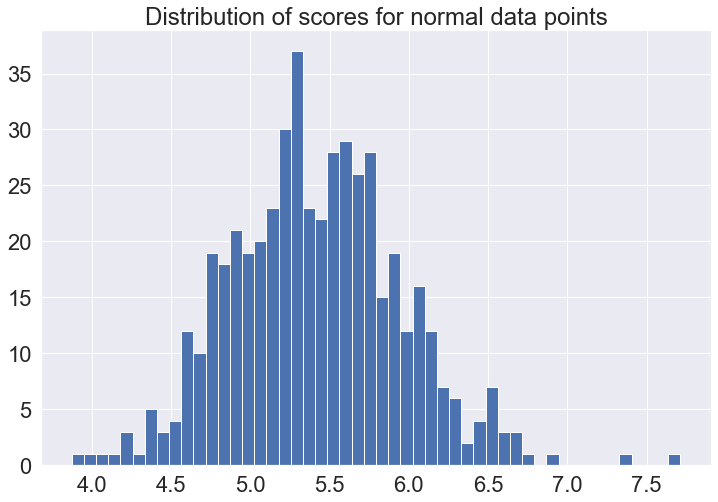

In [44]:
plt.figure(figsize=(12,8))
_ = plt.hist(y_dev_scores[0:495], bins=50)
plt.title("Distribution of scores for normal data points")
print(f"Scores of anomalies {y_dev_scores[495:]}")

Lets select score >= 10 as threshold for anomalies.

In [45]:
y_dev_pred = np.array([0 if s < 10 else 1 for s in y_dev_scores])
#Lets compute the Confusion Matrix and F1 score
cm = confusion_matrix(y_dev, y_dev_pred)
print(cm)
print(f"Dev F1 Score = {f1_score(y_dev,y_dev_pred, pos_label=1):0.3}")

[[495   0]
 [  0   5]]
Dev F1 Score = 1.0


In Dev set we have F1 score of 1.0. **AutoEncoder** is able to identify outliers perfectly.
Lets test it on test set.

In [46]:
#Lets apply the auto encoder on test set
y_test_scores = clf.decision_function(X_test_std)  
y_test_pred = np.array([0 if s < 10 else 1 for s in y_test_scores])
#Lets compute the Confusion Matrix and F1 score
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
print(f"Test F1 Score = {f1_score(y_test,y_test_pred, pos_label=1):0.3}")

[[495   0]
 [  0   5]]
Test F1 Score = 1.0


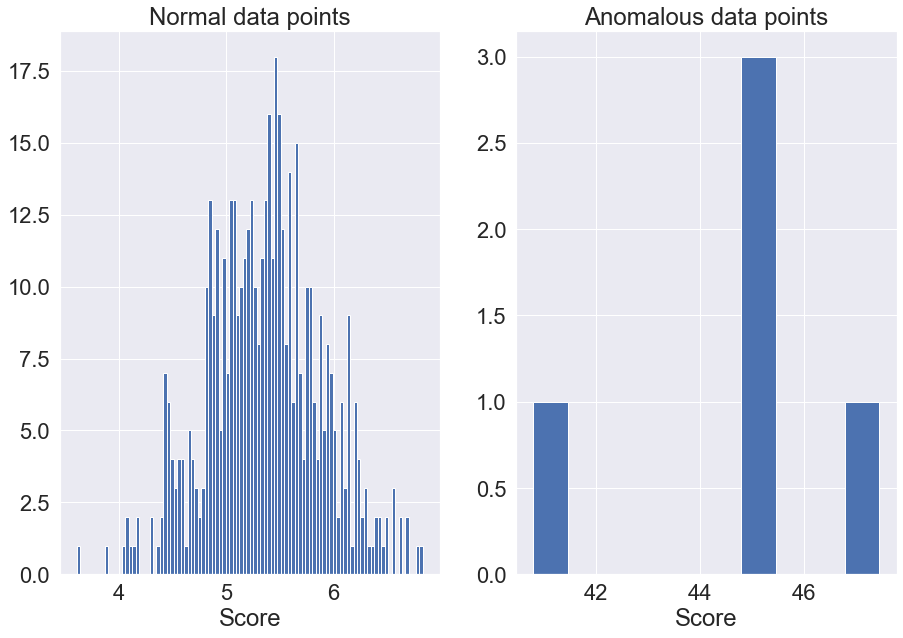

In [47]:
df_scores_test = pd.DataFrame({'labels':y_test.flatten(), 'scores': y_test_scores})

plt.figure(figsize=(15,10))
ax1 = plt.subplot(1,2,1)
ax1.set_title('Normal data points')
ax1.set_xlabel('Score')
df_scores_test[df_scores_test['labels']==0]['scores'].hist(bins=100,ax =ax1)
ax2 = plt.subplot(1,2,2)
ax2.set_title('Anomalous data points')
ax2.set_xlabel('Score')
df_scores_test[df_scores_test['labels']==1]['scores'].hist(bins=10,ax =ax2)

plt.savefig('AnomalyScore-AE.png')

In test set also we have F1=1.0. **AutoEncoder** is performing really well on this test set. Having said this synthetic data is also very easy with normal points coming from normal distribution and anomalous points coming from uniform distribution.

### GANomaly

Generative Adversarial Networks (**GANs**) are  a class of Neural networks 
where two neural networks compete between each other in a zero sum game. 
Given a training set, **GANs** learn to generate new data with the same distributions as the training data. 
Among many things **GANs** have been successfully applied to learn complicated distributions of images 
and generate realistic looking images from that distribution 
See - https://thispersondoesnotexist.com/.

This ability of **GANs** to learn complex distributions can be used to make anomaly detectors, 
as proposed in https://arxiv.org/abs/1805.06725 .

Basic idea of the paper is to train a **GAN** to learn a distribution of normal data, 
then if an instance of abnormal data comes it should say 
this has very low probability to come from the collection of normal samples and hence its most likely an anomaly.
In the paper authors trained their method on normal images of airline baggage.
When the trained network was presented with an image of baggage with a firearm in it, it was able to detect it as anomalous.   

Below is an image from the paper where **GANomaly** is applied to detect a weapon in the baggage.

<img src="ganomaly-xray.png" width="1000" height="400">


You can see from the above image that the network detects weapons in the baggage.

**GANomaly** network code is available from https://github.com/samet-akcay/ganomaly

Below we will show results of training **GANomaly** network on **CIFAR-10** dataset, we will treat every other class except *plane* as a normal class during training. When the trained network is presented with an image of *plane* it should then classify it as an anomaly.

Command used to run the **GANomaly** code

```python train.py --dataset cifar10 --abnormal_class plane --display --device cpu --isize 32 --niter 15```

After training the model, i saved the anomaly score and labels in a dataframe, below we will load the dataframe and do analysis on it. 

In [48]:
#Load the anomaly score dataframe trained from ganomaly
df_ganomaly = pd.read_csv('anomaly.csv')

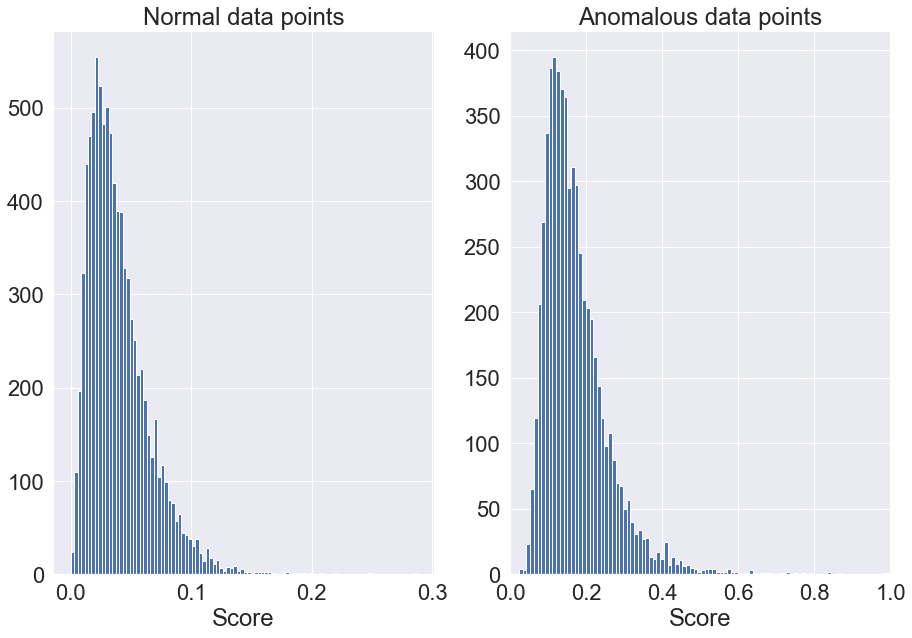

In [49]:
#Lets plot histogram of scores as a function of labels
plt.figure(figsize=(15,10))
ax1 = plt.subplot(1,2,1)
ax1.set_title('Normal data points')
ax1.set_xlabel('Score')
df_ganomaly[df_ganomaly['labels']==0]['scores'].hist(bins=100,ax=ax1)
ax2 = plt.subplot(1,2,2)
ax2.set_title('Anomalous data points')
ax2.set_xlabel('Score')
ax2.set_xlim([0,1.0])
df_ganomaly[df_ganomaly['labels']==1]['scores'].hist(bins=100,ax=ax2)
plt.savefig('AnomalyScores-GANomaly.png')

In [50]:
print(f"Nomral data score {df_ganomaly[df_ganomaly['labels']==0]['scores'].mean():.4}")
print(f"Abnormal data score {df_ganomaly[df_ganomaly['labels']==1]['scores'].mean():.4}")

Nomral data score 0.0396
Abnormal data score 0.173


We can see abnormal data has higher mean score than normal data, as expected. We can also draw the ROC curve of the model.

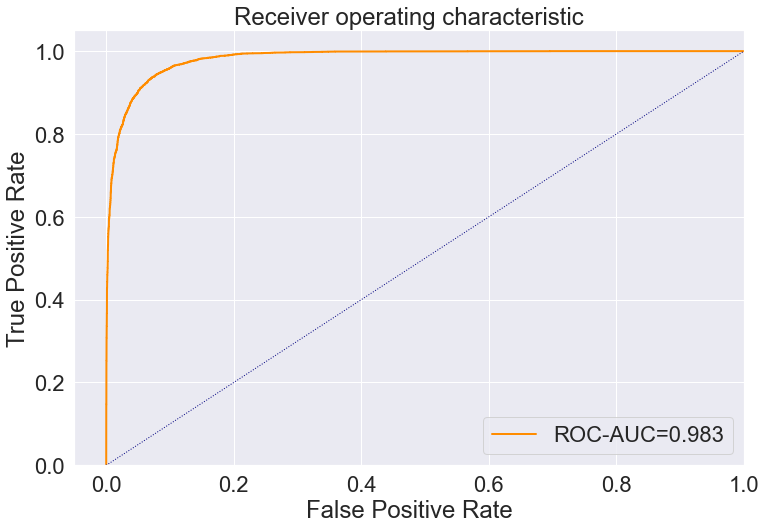

In [57]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
fpr, tpr, _ = roc_curve(df_ganomaly['labels'].values, df_ganomaly['scores'].values)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC-AUC={roc_auc:.3}')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle=':')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig("ROC.png")

Lets make precision recall curve

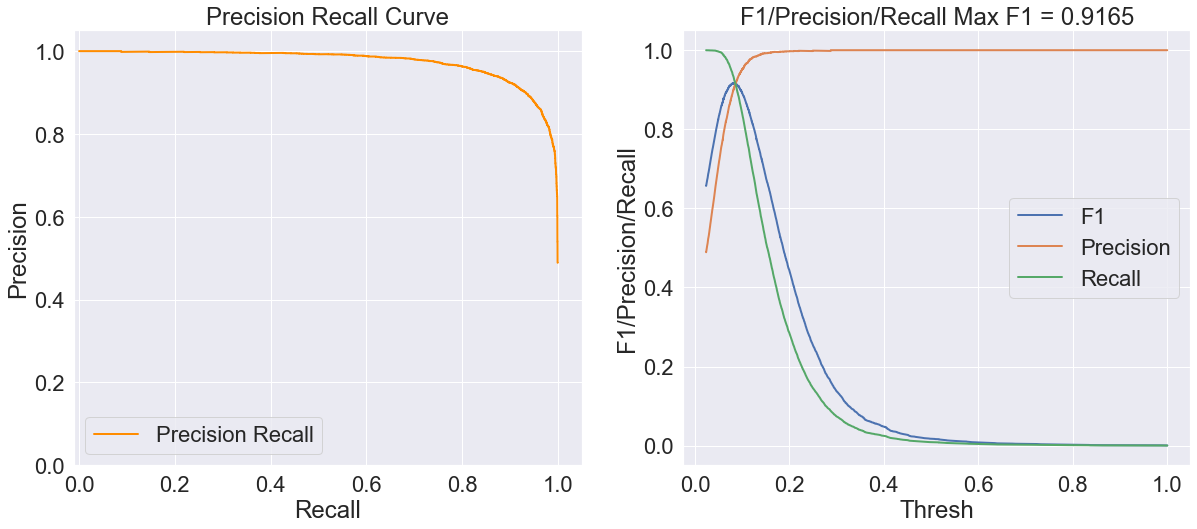

In [59]:
pr,rec,thresh = precision_recall_curve(df_ganomaly['labels'].values, df_ganomaly['scores'].values)
df_f1 = pd.DataFrame({'rec':rec[:-1],'pr':pr[:-1],'thresh':thresh})
df_f1['f1']=2*df_f1['rec']*df_f1['pr']/(df_f1['rec']+df_f1['pr'])

plt.figure(figsize=(20,8))
ax1 = plt.subplot(1,2,1)
lw = 2
ax1.plot(rec, pr, color='darkorange', lw=lw, label=f'Precision Recall')
ax1.set_xlim([-0.01, 1.05])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('Precision Recall Curve')
ax1.legend()

ax2 = plt.subplot(1,2,2)
ax2.plot(df_f1['thresh'],df_f1['f1'], lw=lw, label='F1')
ax2.plot(df_f1['thresh'],df_f1['pr'], lw=lw, label='Precision')
ax2.plot(df_f1['thresh'],df_f1['rec'], lw=lw,label='Recall')
ax2.set_xlabel('Thresh')
ax2.set_ylabel('F1/Precision/Recall')
ax2.set_title('F1/Precision/Recall Max F1 = 0.9165')
ax2.legend()

plt.savefig("PR.png")

In [53]:
#Maximum F1 score for threshold
print(f"Threshold {df_f1.iloc[df_f1['f1'].argmax()]['thresh']:.5} for max F1 score")
print(f"Max F1={df_f1['f1'].max():.4}")

Threshold 0.081695 for max F1 score
Max F1=0.9165


In [54]:
#assign classes based on above threshold
df_ganomaly['y_pred'] = np.where(df_ganomaly['scores'] > 0.081695, 1, 0)

In [55]:
cm = confusion_matrix(df_ganomaly['labels'].values, df_ganomaly['y_pred'].values)
print(cm)

[[8383  617]
 [ 403 5597]]


Out of 6000 plane figures **GANomaly** is able to identify 5597 correctly. It also had some false positives, but overall a very decent classifier for Anomaly detection.